# Intro to python

Welcome to Google Colaboratory, we will use this framework to ease up the execution of the notebooks presented in the classes of Astrophysics Lab.
For more info about CoLab, plese look at [this tutorial](https://colab.research.google.com/#scrollTo=-Rh3-Vt9Nev9).

# Lesson 0. Utilities of Numpy  

The library `numpy` is one of the most important   python modules to deal with python arrays and matrices.  
Let's see how a vector with  `N=100` elements is initialized.


In [5]:
import numpy as np
import pylab as pl

In [6]:
N=100
v= np.zeros(N, dtype=float)
print(v, type(v),)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] <class 'numpy.ndarray'>


`v` is a `class`  object, employing several `attributes` and functionalities. like :  

In [7]:
v+= np.arange(N)

print(  v.size, v.min(), v.mean(), v.std(), v.argmin(), v.argmax()  )

100 0.0 49.5 28.86607004772212 0 99


please check the  [numpy documentation](https://numpy.org/) for more details.  Matrices can be initialized similarly .


In [8]:
A = np.matrix( [[1,0,3],[0,4,5],[2,3,0]])
print (A)
print (f"A is a {A.shape} matrix"  )
print(f"determinant :{np.linalg.det(A)}")


[[1 0 3]
 [0 4 5]
 [2 3 0]]
A is a (3, 3) matrix
determinant :-38.99999999999999


# Linear systems

we can solve linear system easily , together with finding the eigenvalues and eigenvectors of $A$

In [9]:
b= np.ones(3)

x= np.linalg.solve(A, b)

print(f"solution of Ax = b, x={x}" )
print("check whether Ax -b =0 ", A.dot(x) - b)


lambdas, W= np.linalg.eig(A,  )
Adiag= np.diag(lambdas)
print("diagonal form of A:\n", Adiag    )

solution of Ax = b, x=[0.46153846 0.02564103 0.17948718]
check whether Ax -b =0  [[0. 0. 0.]]
diagonal form of A:
 [[-3.39410744  0.          0.        ]
 [ 0.          1.72222899  0.        ]
 [ 0.          0.          6.67187845]]


In [10]:
print( "Check that Aw = lambda w\nw0",
      A.dot(W[:,0]) - lambdas[0]* (W[:,0]), "\nw1",
A.dot(W[:,1]) - lambdas[1]* (W[:,1]), "\nw2",
A.dot(W[:,2]) - lambdas[2]* (W[:,2]))

Check that Aw = lambda w
w0 [[ 6.66133815e-16]
 [-2.22044605e-16]
 [-4.44089210e-16]] 
w1 [[-2.22044605e-16]
 [ 1.11022302e-16]
 [ 5.55111512e-17]] 
w2 [[4.4408921e-16]
 [0.0000000e+00]
 [4.4408921e-16]]


## Integration and differentiation


assume we have a function,
$f(x) = 2x^3 + e^{-3x}$, and we wanna estimate the derivative and the integral.
We can use _symbolic python_,  `sympy` to do the heavy lifting to  calulate and estimate'em  with the funcion `lambdify`.



In [11]:
import scipy
from scipy.integrate import quad
import sympy
from sympy import lambdify
from sympy.abc import x

In [12]:
f= 2*x**3 + sympy.exp(-3*x )
# now the function becomes from symbolic to a real function written in python code
func= lambdify(x, f )
# it's implementation should be exactly the same as the following lines of code:
def function (x):
    return 2*x**3 + np.exp(-3*x)

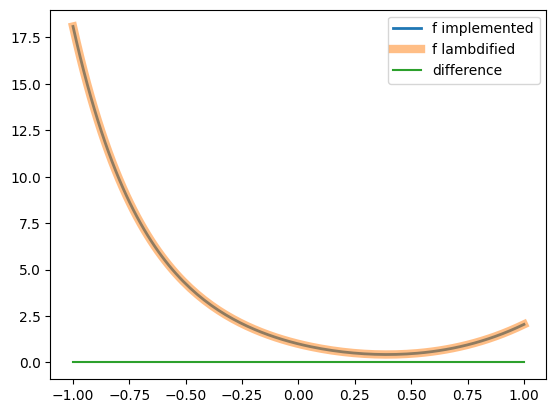

In [13]:
xvalues= np.linspace(-1,1,128 )
pl.plot(xvalues, function(xvalues), lw=2, label='f implemented')
pl.plot(xvalues, func(xvalues),lw=6, alpha=.5 ,label='f lambdified')
pl.plot(xvalues,function(xvalues) -func(xvalues), label='difference' )
pl.legend()

Estimating derivatives and integral is as simple as this:


In [14]:
print("f(x)= ",f   )
print("df/dx= ",f.diff()  )
print("integral[f dx] = ",f.integrate()  )


f(x)=  2*x**3 + exp(-3*x)
df/dx=  6*x**2 - 3*exp(-3*x)
integral[f dx] =  x**4/2 - exp(-3*x)/3


Thus we can even lambdify the primitive functions, $F$ to estimate the definite integral :
$$
F(b)- F(a) = \int_a^b f dx
$$
we'll consider $a=-1$ and $b=1$

In [15]:
prim_func= lambdify(args=x, expr= f.integrate()  )
a=-1
b=1
print("Definite integral" , prim_func(b) - prim_func(a))

Definite integral 6.6785832849399345


this result should be about the same as  the one obtained with `np.trapz` and to `scipy.integrate.quad`. We 'll show the different usage in the following:

In [16]:
int_np =np.trapz(y= func(xvalues), x=xvalues )
print("Trapezoidal rule (numpy):",int_np)

int_sp =quad(function, a=-1, b=1 )
print("Quadrature rule (scipy):",int_sp)

Trapezoidal rule (numpy): 6.679825457707189
Quadrature rule (scipy): (6.6785832849399345, 7.414716934817028e-14)


<ipython-input-16-5b948e5beea9>:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  int_np =np.trapz(y= func(xvalues), x=xvalues )


for the latter the second value returned is the error associated to the estimate.

## Best-Fit   using `scipy.optimize.curve_fit`

let's assume we've data distributed with a Normal distribution and we want to fit the Gaussian curve associated to it.
We will use `curve_fit` to do this. We firstly generate our fake data set with random numbers normally distributed:

In [17]:
import scipy
from scipy.optimize import curve_fit

In [18]:

xvalues = np.random.normal(loc=0, scale=4, size=1000)


we will estimate the  histogram (normalized to 1), now the frequency $y$ in each bin $x$ correspond to our data we wanna fit, we also  associate fake error bars  to the measurements $y$,  $1\%$ error bars .

<ErrorbarContainer object of 3 artists>

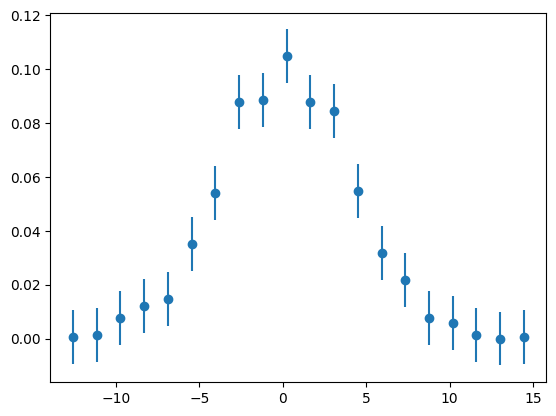

In [19]:

y, edges  = pl.histogram(xvalues, bins=20, density=True  )
yerr=np.ones_like(y)*0.01
xbins = np.array([.5*(edges[i+1] + edges[i] ) for i in range(y.size )])
pl.errorbar( xbins, y,yerr= yerr , fmt='o'  )



let's make the assumption now that the model  function is a gaussian , parametrized by 3 parameters, $A,
\mu, \sigma$

In [20]:
gaussian = lambda x,A ,  mu,sigma: A* np.exp(-(x-mu)**2/2/(sigma**2 ))


estimate the best- fit  parameters

In [21]:
bestfit_params,covariances_params= curve_fit(gaussian, xbins, y ,sigma= yerr)

In [22]:
print((covariances_params))

[[ 5.65448269e-06  5.15014865e-09 -1.45892018e-04]
 [ 5.15014865e-09  1.12898929e-02 -4.34006887e-07]
 [-1.45892018e-04 -4.34006887e-07  1.12915332e-02]]


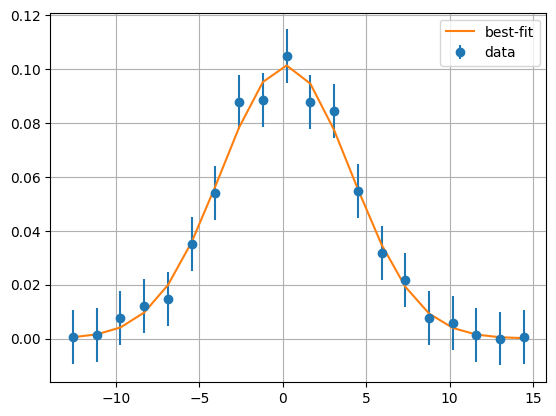

In [23]:
pl.errorbar( xbins, y,yerr= yerr , fmt='o', label='data'  )
pl.plot( xbins, gaussian(xbins,*bestfit_params), label='best-fit' )
pl.legend()
pl.grid()



## Finding the roots  

Another useful think  is to find the zeros of a function, e.g.  

$f(x_s) =  x - \log {3x}=0 $

let's find $x_s$ such that:

$ x_s= \log {3x_s}$


In [24]:
from scipy.optimize import root_scalar

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.6190612867359375
         method: brentq


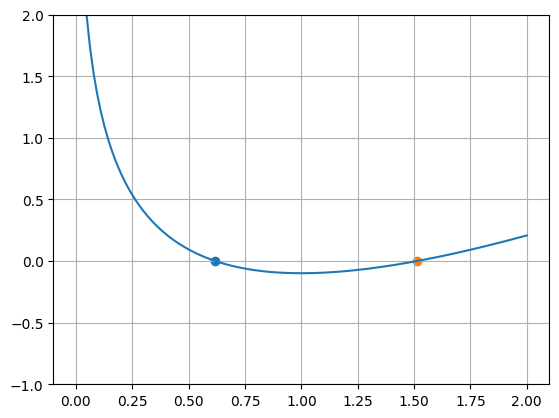

In [25]:
def f(x):
    return x -  np.log(3*x)

xvalues= np.linspace(1e-6,2,128 )
pl.plot(xvalues, f(xvalues))
pl.grid()

s= root_scalar(f,  bracket=[1e-4, 1], method='brentq')
pl.scatter (s.root,f(s.root), marker='o'  )
pl.ylim(-1,2)
print(s)
s= root_scalar(f,  bracket=[ 1,2], method='brentq')
pl.scatter (s.root,f(s.root), marker='o'  )

